In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]

In [5]:
single_image.shape

(28, 28)

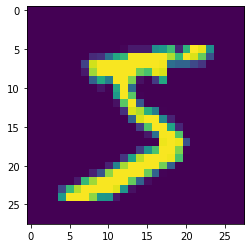

In [6]:
plt.imshow(single_image)

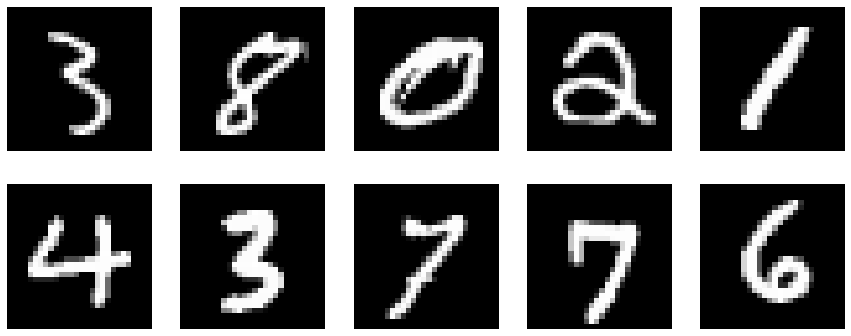

In [7]:
from random import randrange

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for x in range(0,2):
    for y in range(0,5):
        axs[x,y].axis('off')
        axs[x,y].imshow(x_train[randrange(60000)], cmap='gist_gray')

plt.show()

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_cat_train = to_categorical(y_train)

In [12]:
y_cat_train.shape

(60000, 10)

In [13]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test)

In [15]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
# instead of using a scaler, we can just divide it by 255 because we have prior knowledge of how the image will be scaled
x_train = x_train/255
x_test = x_test/255

In [20]:
scaled_image = x_train[0]

In [21]:
scaled_image.max()

1.0

In [22]:
scaled_image.min()

0.0

In [23]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

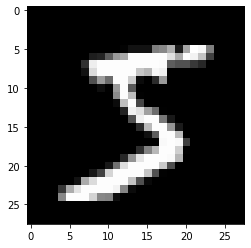

In [24]:
plt.imshow(scaled_image, cmap='gist_gray')

In [25]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

model.add(Conv2D(
    filters=32,
    kernel_size=(4,4),
    padding='valid',
    input_shape=(28,28,1),
    activation='relu'
))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

# multi class -> softmax
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [30]:
model.fit(x_train, y_cat_train, epochs=10, callbacks=[early_stop], validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3738 - accuracy: 0.8899 - val_loss: 0.0787 - val_accuracy: 0.9752
Epoch 2/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.0692 - val_accuracy: 0.9791
Epoch 3/10
1407/1407 [==============================] - 12s 9ms/step - loss: 0.0391 - accuracy: 0.9886 - val_loss: 0.0697 - val_accuracy: 0.9788


In [31]:
history = pd.DataFrame(model.history.history)

<AxesSubplot:>

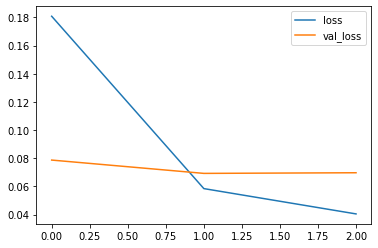

In [32]:
history[['loss', 'val_loss']].plot()

<AxesSubplot:>

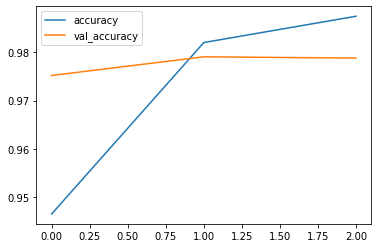

In [33]:
history[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

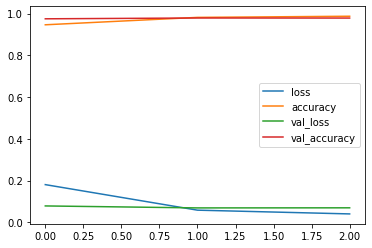

In [34]:
history.plot()

In [35]:
model.evaluate(x_test, y_cat_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9815


[0.057758357375860214, 0.9815000295639038]

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
predictions = model.predict_classes(x_test)

/home/rishab/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.97      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.94      0.99      0.97       892
           6       1.00      0.94      0.97       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot:>

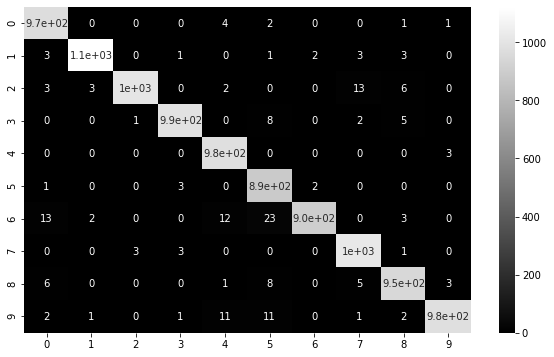

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='gist_gray')
# plt.ylim()

In [100]:
my_num = x_test[randrange(10000)]

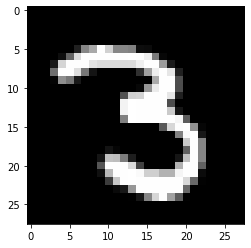

In [101]:
plt.imshow(my_num.reshape(28,28), cmap='gist_gray')

In [102]:
# batch_size,width,height,color_channels
model.predict_classes(my_num.reshape(1,28,28,1))

array([3])

In [103]:
model.save('mnist_number_model.h5')